# Escalamiento de datos numéricos

### Transformaciones lineales

In [ ]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

**La transformación:**

raw = X[:, None, 2]
Esta transformación puede crear un poco de confusión si no conoces algunos detalles sobre NumPy. Para las dudas te detallo un poco que hizo en esta línea de código.

Note: X tiene un shape de (442, 10) para nuestro estudio solo necesitamos una columna, buscamos tener un raw con shape (442, 1)

: toma todas las columnas y filas.
None indica la transformación del arreglo (newaxis)
2 Selecciona la 3ra columna de X.
Más información sobre Numpy Newaxis

In [ ]:
# print(raw)

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


$$
z= \frac{x - \mu(x)}{\sigma(x)}
$$

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

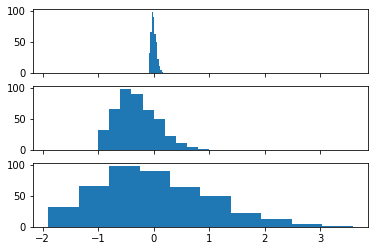

In [ ]:
# reglas de escalamiento

# maximo minimo

max_raw = max(raw)
min_raw = min(raw)

scaled = (2* raw - max_raw - min_raw)/(max_raw - min_raw)
# print(scaled)

# normalizacion Z
avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

# grafica

fig, axs = plt.subplots(3, 1, sharex=True)

# se le dice que grafico dibujar para cada eje
axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)



In [ ]:
# modelo de entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw,y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled,y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [ ]:
raw_time = timeit.timeit(train_raw, number=100)
scaled_time = timeit.timeit(train_scaled, number=100)
z_scaled_time = timeit.timeit(train_z_scaled, number=100)
print('train raw : {}'.format(raw_time))
print('train scaled : {}'.format(scaled_time))
print('train z scaled : {}'.format(z_scaled_time))

train raw : 0.057336664000104065
train scaled : 0.04192510499888158
train scaled : 0.04193426599886152


In [ ]:
# raw_time = timeit.timeit(train_raw, number = 100)
# scaled_time = timeit.timeit(train_raw, number = 100)
# z_scaled_time = timeit.timeit(train_raw, number = 100)
# print('trainning time for raw data : {} '.format(raw_time))
# print('trainning time for scaled data : {}'.format(scaled_time))
# print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.07451489300001413 
trainning time for scaled data : 0.06742551799834473
trainning time for z_scaled data : 0.06812811800045893


* max-min scaling: mejor para datos uniformemente distribuidos, forma normal o campana de gauss
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

## Transformaciones no lineales

estas transformaciones son mas adecuadas cuando los datos tienen una distribución fuertemente sesgada (no uniforme).

Tras la transformacion la distribucion resultantente se aproxima a una distribucion normal.

Se usan para luego escalar linealmente los datos. con las formulas conocidas.

In [ ]:
df = pd.read_csv('cars.csv')

<AxesSubplot:>

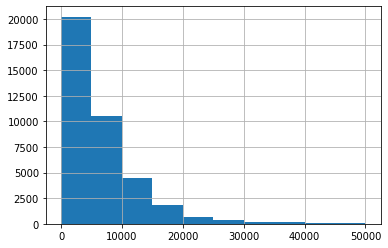

In [ ]:
df['price_usd'].hist()

Transformación con $$tanh(x)$$

la tangente hiperbolica se puede calibrar dividiendo la variable de por un numero dentro de la funcion tangente

<AxesSubplot:>

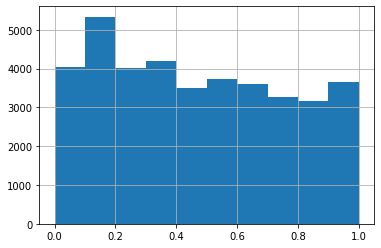

In [ ]:
p = 10000
# colapsaron todos los valores en un punto
# df['price_usd'].apply(lambda x: np.tanh(x)).hist()

# la tangente hiperbolica se puede calibrar dividiendo la variable de entrada por un escalar que se va calibrando
df['price_usd'].apply(lambda x: np.tanh(x/p)).hist()


* mapear datos a a distintas distribuciones en datos que NO estan uniformemente distribuidos

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

# Pipelines de procesamiento para variables categóricas

## Mapeos númericos 

### Dummy

- Representación compacta
- Mejor para inputs linealmente independientes

### One-hot

- Permite describir categorías no incluidas inicialmente

### Notas alumnos

Cuando se tiene variables categóricas se hace un mapeo numérico. Para eso hay 2 métodos, de manera que sean fácilmente interpretables en modelos de machine learning:

**Dummy :** es la representación más compacta que se puede tener de los datos. Es mejor usarla cuando los inputs son variables linealmente independientes (no tienen un grado de correlación significativo). Es decir, las cuando se sabe que las categorías son independientes entre sí.

**One-hot :** es más extenso. Permite incluir categorías que no estaban en el dataset inicialmente. De forma que si se filtra una categoría que no estaba incluida, igual se pueda representar numéricamente y no de error en el modelo (este modelo es más cool y es el que se usa).
Hay errores en la notación de Pandas y los tratan como que ambos modelos son lo mismo, pero en la realidad el Dummy no se usa. Aún así, en Pandas el método es .get_dummies().

### Dato curioso:

La independencia lineal tiene un transfondo matematico.

Normalmente se ve mucho en temas de algebra lineal, ya que a partir de la independencia lineal se pueden construir tanto espacios vectoriales como multiples aplicaciones para ecuaciones diferenciales y de matemática en general.

Como una idea simple, se puede decir que una variable es linealmente independiente si no puede obtenerse a partir de otras variables. Es un poco más complejo…

Dato extra:
Los 3 ejes de un sistema de coordenadas cartesianas son linealmente independientes, X,Y,Z.
No puedes obtener X a partir de Y y Z, lo mismo para las otras 2.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc504059-8ad6-4235-92fa-88fa0fec1687' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>